In [2]:
! pip install tonic


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.3/104.3 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 5.2 MB/s eta 0:00:00
  Created wheel for importRosbag: filename=importRosbag-1.0.3-py3-none-any.whl size=25451 sha256=edaf4a4145dc1340658b2f27a0cea129670308635b99f92577f92c56a25da9a8
  Stored in directory: /root/.cache/pip/wheels/7f/a3/dd/959c5e661d227bac3fe3988df383132b18506f39831ffb2209
Successfully built importRosbag


In [3]:
! pip install snntorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.7/104.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
import tonic

dataset = tonic.datasets.CIFAR10DVS(save_to='./data')
events, target = dataset[0]

  0%|          | 0/11168490039 [00:00<?, ?it/s]

Extracting ./data/CIFAR10DVS/CIFAR10DVS.zip to ./data/CIFAR10DVS


ModuleNotFoundError: ignored

In [5]:
print(events)

[(16,  9,   1138, 0) (11, 16,   2428, 0) (17,  6,   2953, 1) ...
 (23, 15, 308605, 1) ( 8,  5, 309710, 1) (30, 22, 310333, 1)]


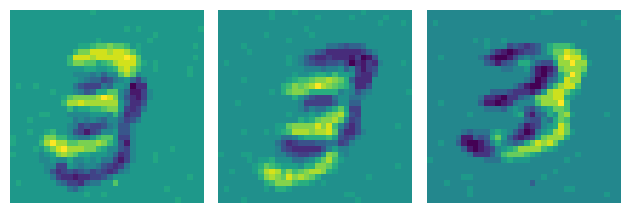

In [6]:
tonic.utils.plot_event_grid(events)


In [7]:
events[:10]

array([(16,  9, 1138, 0), (11, 16, 2428, 0), (17,  6, 2953, 1),
       ( 8, 25, 3042, 0), (11, 17, 3824, 0), (14, 24, 4119, 0),
       (11, 25, 4716, 0), (17,  9, 5197, 0), (18,  9, 5213, 0),
       (13, 16, 6162, 0)],
      dtype=[('x', '<i8'), ('y', '<i8'), ('t', '<i8'), ('p', '<i8')])

In [8]:
import tonic.transforms as transforms

sensor_size = tonic.datasets.NMNIST.sensor_size

# Denoise removes isolated, one-off events
# time_window
frame_transform = transforms.Compose([transforms.Denoise(filter_time=10000),
                                      transforms.ToFrame(sensor_size=sensor_size,
                                                         time_window=1000)
                                     ])

trainset = tonic.datasets.NMNIST(save_to='./data', transform=frame_transform, train=True)
testset = tonic.datasets.NMNIST(save_to='./data', transform=frame_transform, train=False)

  0%|          | 0/169674850 [00:00<?, ?it/s]

Extracting ./data/NMNIST/test.zip to ./data/NMNIST
